In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.io import fits
from astropy.table import Table
from psf_tools import run_hst1pass, align_images, make_final_table
from scipy.stats import binned_statistic

%load_ext autoreload
%autoreload 2


The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol


### Get the list of images

In [6]:
input_images = sorted(glob.glob('*flc.fits'))

In [7]:
for im in input_images:
    print(im)

id5e10saq_flc.fits
id5e10scq_flc.fits
id5e10seq_flc.fits
id5e10sgq_flc.fits
id5e10siq_flc.fits
id5e10skq_flc.fits


### See input options:

In [ ]:
run_hst1pass?

In [11]:
run_hst1pass(input_images=input_images, hmin=4, fmin=250., pmax=65000., executable_path='./psf_tools/hst1pass.e')

./psf_tools/hst1pass.e HMIN=4 FMIN=250.0 PMAX=65000.0 OUT=xympqk  id5e10saq_flc.fits id5e10scq_flc.fits id5e10seq_flc.fits id5e10sgq_flc.fits id5e10siq_flc.fits id5e10skq_flc.fits


ARG0000  ./psf_tools/hst1pass.e
ARG0001  HMIN=4
ARG0002  FMIN=250.0
ARG0003  PMAX=65000.0
ARG0004  OUT=xympqk
--->    NLISTs =            1
--->    NITEMs =            6
--->   OUTLIST = xympqk
ARG0005  id5e10saq_flc.fits
---> NIM0001 id5e10saq_flc.fits
ARG0006  id5e10scq_flc.fits
---> NIM0002 id5e10scq_flc.fits
ARG0007  id5e10seq_flc.fits
---> NIM0003 id5e10seq_flc.fits
ARG0008  id5e10sgq_flc.fits
---> NIM0004 id5e10sgq_flc.fits
ARG0009  id5e10siq_flc.fits
---> NIM0005 id5e10siq_flc.fits
ARG0010  id5e10skq_flc.fits
---> NIM0006 id5e10skq_flc.fits




OUTPUT FROM PROGRAM hst2xym

./psf_tools/hst1pass.e

HMIN:   4
FMIN:               250.0
PMAX:             65000.0
PSFFILE0: AUTO
GDCFILE0: AUTO
PSFFILEI: NONE
GDCFILEI: AUTO
DOAPPHOT: F

DOSATD: T
GDC_INP: AUTO
GDC_LIB: NONE
GDC_USE: NONE
PSF_INP: NONE
PSF_LI

30  844.203   27.560  -8.009  102.7|5 4 7|    346|   219   169   164   307|   156   119   245   164|     102    1119     732
40 1124.420   37.257  -8.912   48.3|5 5 8|    542|   505   182   402   224|   351   145   206    81|      48    1801    1600
50 3699.431   42.401  -9.750   29.4|5 5 8|   1306|   427    55   720   715|   110    42   517    52|      29    2967    2845
60 1496.712   50.054  -7.226   40.0|5 4 7|    137|    90   125   116    95|    44    85    63    83|      39     464     305
70 3785.557   53.610  -7.178   26.5|5 4 7|    190|    30   121    24   106|    45    27    40   106|      26     524     414
80  924.690   60.981  -9.077   63.3|5 5 8|    740|   115   335   373   616|    86   688   138   265|      63    2137    1875
90  977.734   76.517  -8.594   71.7|5 5 8|    407|   223   304   367   158|   190   348   127   118|      71    1427    1139
100 1384.741   83.242  -6.976   47.4|5 4 7|    184|    65   102   117    66|    47    84    47    65|      47     489     298

5000 1305.439 1981.763  -8.742   81.2|5 5 8|    819|   769   113   106   231|    98   147   248   142|      81    2069    1718
5100 1904.183 2015.547  -9.195   92.0|5 5 8|   1083|   239   256   205   721|   125   143   860   157|      91    2905    2534
5200 2391.896 2058.044  -8.055   63.7|5 5 8|    349|   165   208   188   208|   149   160   107   123|      63     907     646
5300 1537.132 2098.017 -12.022   72.3|5 710|  10061|  6122  4274  5271  4934|  3102  2376  3095  1939|      72   24558   24193
5400 2530.757 2139.350  -8.455   64.2|5 5 8|    369|   150   302    94   369|   100    84   196   272|      64    1314    1052
5500 1189.656 2183.032 -11.361   46.1|51013|   5206|   451   208   662  4292|  4783    63   128  2250|      46   11958   11785
5600 2015.134 2222.835 -10.367   63.9|5 710|   2290|   781   464  1040  1775|   860   209   458   746|      63    5306    5077
5700 3113.701 2262.221 -12.055   56.2|51114|   9987|  3148  7521  6719  3603|  1979  5199  1273  2500|      56 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    155.99921828350000       10:23:59.81
CRVAL2:   -57.764675061759988      -57:45:52.83

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---         9161

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (05:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (05:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

40  590.684   30.518  -7.490  174.3|5 3 6|    313|   204   286   194   283|   151   196   228   261|     174    1144     460
50  730.584   39.129  -6.052  293.8|5 2 5|    349|   311   303   293   309|   325   295   295   307|     293    1279     281
60  731.904   44.954  -6.594  298.7|5 2 5|    352|   351   343   325   349|   303   332   286   320|     298    1365     418
70 2175.453   53.600  -7.897   42.4|5 5 8|    337|   241    59    37   233|    69    45   169    53|      42     982     804
80 4057.305   60.379  -9.216   21.3|5 710|   1032|  1023   114   685    63|   279   124   108    37|      21    3020    2916
90  467.224   67.336  -7.171  129.7|5 3 6|    210|   191   197   201   173|   198   168   154   132|     129     801     314
100  980.560   73.257  -8.605   69.9|5 5 8|    421|   172   406   329   212|   153   311   112   171|      69    1469    1181
150 1839.315  112.314 -11.682   35.3|51114|   6709|  5273  2021  5366  2068|  3907  1787  1792   669|      35   21256   2105

5100  492.508 1886.281  -7.423   58.2|5 4 7|    186|   110   180   142    78|    59   133    96    77|      58     642     405
5200 1444.848 1917.043  -9.730   47.3|5 710|   2088|   906   703   264   244|    96   314   155   143|      47    3394    3207
5300 2029.450 1945.652  -7.424   55.5|5 4 7|    175|   157    80    89   160|   100    73   153    81|      55     646     418
5400 2099.489 1973.318  -7.383   59.5|5 4 7|    181|   170    75   154    77|   135    96   115    45|      59     642     405
5500 1309.103 2008.910  -9.485  192.4|5 3 6|    910|   618   635   612   650|   437   390   617   396|     192    2797    2114
5600 1560.893 2035.744  -9.203   49.3|5 4 7|    772|   346   514   291   571|   145   210   311   339|      49    2197    1998
5700 2239.004 2077.738  -9.586   53.7|5 6 9|   1024|   593   658   422   820|   234   218   422   398|      53    2902    2676
5800 2163.864 2115.106  -8.418   55.4|5 5 8|    363|   230   305   249   212|   128   201   149   130|      55 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    155.99929726650001       10:23:59.83
CRVAL2:   -57.764654154652000      -57:45:52.74

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---         9921

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (05:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (05:12)     p -- peak pixel value
F19 (07:12)     q -- quality of f

30 1331.378   28.826  -9.179   49.4|5 6 9|    876|   282    58   805   205|    56   617   596    51|      49    2358    2186
40  110.711   34.357  -7.380  122.4|5 3 6|    234|   174   213   210   163|   167   204   134   150|     122     863     347
50 1599.981   40.016  -8.759   31.4|5 5 8|    573|   350   370   161   138|    42   362   374    49|      31    1467    1337
60 1381.127   46.931  -7.672   48.8|5 4 7|    235|   150   135   120   144|   103    91   119    72|      48     650     449
70 1601.640   52.691  -7.239   37.7|5 5 8|    148|    68   137    67   130|    52    58    51    99|      37     516     366
80 1729.700   61.403  -9.239   33.5|5 5 8|   1074|    40    98   235   580|    37   599   346    28|      33    2041    1907
90 3578.117   66.978  -9.152   28.9|5 5 8|   1176|   635   830    27    26|    31    27    37    36|      28    2070    1948
100 1333.364   72.285  -9.468   42.3|5 6 9|   1291|   481   910   235    80|   498    74    71    59|      42    2511    2338

5000 1676.072 1743.211  -8.951  175.1|5 5 8|    713|   495   442   528   369|   373   367   309   232|     175    2109    1387
5100 4038.990 1760.718 -10.314   30.7|51013|   2246|  1313   717   377  1191|   637    94   348  1343|      30    5499    5381
5200 2204.890 1777.492  -7.552  167.0|5 2 5|    399|   177   212   150   239|   142   169   229   232|     167    1083     423
5300 3931.102 1800.134  -9.318   29.4|5 710|   1045|   725   281   402   215|   121   995   197    43|      29    2725    2608
5400 1816.641 1824.324  -8.231  243.0|5 3 6|    473|   376   375   403   348|   245   448   457   284|     242    1701     876
5500 2004.535 1848.004 -10.265   84.7|5 5 8|   1804|   545  1687   952   950|   302   944   334   853|      84    5389    5048
5600 2168.746 1877.108  -7.377   63.4|5 4 7|    226|    98   163   128   121|    83   113    75    82|      63     631     374
5700 1742.813 1908.387 -12.219   73.3|51013|  10653|  4366  6819  8853  3055|  3474  6402  1418  1892|      73 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    155.99928297162000       10:23:59.82
CRVAL2:   -57.764597781131002      -57:45:52.55

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---        11124

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (05:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (05:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

40  217.322   35.512  -9.763  101.6|5 6 9|   1145|   896   367  1132   328|   859   424   307   163|     101    4034    3603
50 3187.984   42.506  -7.827   37.1|5 4 7|    235|   135   116   225    70|   127   144    50    62|      37     723     592
60  233.407   50.978  -8.561  116.2|5 5 8|    696|   596   167   230   260|   220   138   235   131|     116    1790    1324
70 1674.827   56.478  -9.086   29.9|5 6 9|   1026|   174   347   863    95|   154   319    45    68|      29    2557    2433
80 1872.349   61.096  -9.647   26.6|5 811|   1270|   497    57   302   605|   282   101   104   852|      26    2784    2683
90 3451.800   69.021  -8.061   34.5|5 5 8|    336|   133   216   148   149|    78   122    87   102|      34     822     680
100 1687.940   75.131 -12.026   34.5|51114|  10617|  4696  5542  6236  4172|  2545  3371  1978  2078|      34   25767   25549
150 4052.117  109.955 -12.227   28.3|51114|   9973|  4814  4554  5123  4589|  2784  2472  4698  2120|      28   24076   2381

5100 2508.394 1855.750  -9.167   49.9|5 5 8|   1114|   423    92   281   758|   169    71   591    40|      49    2889    2673
5200 3165.967 1889.720  -8.534  128.7|5 4 7|    391|   365   303   263   386|   347   180   215   383|     128    1464     959
5300  990.832 1921.809  -8.769   33.2|5 6 9|    476|   241   348   246   396|    86   158   163   243|      33    1465    1334
5400  727.683 1954.729  -8.425   62.1|5 5 8|    376|   193   309   178   347|   102   141   109   247|      62    1281    1029
5500 2176.389 1985.024  -9.981   52.7|5 811|   1441|  1265   467   785   641|   644   288   692   276|      52    4137    3912
5600 1648.301 2010.783  -7.121   37.7|5 4 7|    139|   106    57    96   115|    54    56    94    50|      37     455     294
5700 1730.751 2038.833 -10.006   52.5|51619|   1549|   516  1130   675  1062|   200   515   465   661|      52    4403    4193
5800 1877.136 2084.737 -11.641   56.1|51013|   6817|  4159  2915  2410  5063|  1289  1161  3170  1924|      56 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    155.99944003336000       10:23:59.86
CRVAL2:   -57.764255989001001      -57:45:51.31

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---        10088

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (05:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (05:12)     p -- peak pixel value
F19 (06:12)     q -- quality of f

40  970.139   47.113  -8.539   60.5|5 5 8|    438|   295   214   302   250|   215   161   158   140|      60    1251    1000
50  303.470   53.473  -7.108   98.5|5 3 6|    181|   112   168   173   118|   111   175   112   133|      98     697     299
60 1402.651   64.758 -10.161   41.8|5 912|   2294|   769   106  1698    44|    47  1467   517    47|      41    5566    5400
70 1917.882   74.194  -8.402   25.5|5 5 8|    400|   173   216   263   180|   102   184    78    80|      25    1065     976
80 1684.740   84.329 -12.023   31.6|51114|   9683|  3157  6495  7279  2719|  2200  5427  1055  1829|      31   28886   28695
90  721.322   93.004  -7.079  404.2|5 2 5|    484|   425   475   440   450|   398   453   413   448|     404    1858     320
100 3202.979   99.155  -7.730   31.4|5 4 7|    181|    83   108   132    85|   143    65    58   140|      31     540     405
150 1277.471  135.279  -9.656   40.9|5 710|    978|   243   969   693   376|   184   765   140   313|      40    3406    323

5100  293.173 2073.386  -9.297   43.3|5 6 9|    712|   529   347   633   261|   471   328   209   135|      43    2347    2165
5200 1025.836 2116.336  -9.174   35.0|5 6 9|    765|   288   432   525   225|   243   454   149   143|      34    2178    2027
5300 2616.490 2159.195  -7.477   58.9|5 4 7|    223|   209    57   130   104|   141    76    88    88|      58     705     477
5400 1082.789 2197.822  -9.179   35.4|5 6 9|   1130|   220   335   303   790|    50   163    59   190|      35    2446    2313
5500  810.182 2238.478 -10.527   28.2|51013|   3765|   758   378   965  1031|  1894   644    55    82|      28    7384    7270
5600 3495.539 2266.994  -7.947   41.6|5 5 8|    253|    83   208   140   154|    68   158    72   146|      41     763     586
5700 3424.749 2313.406  -7.497   29.9|5 5 8|    160|    41   140    53   147|    38    32   101    95|      29     544     417
5800 1605.612 2357.038  -9.277   29.0|5 710|   1202|    84   876   560   216|   111   185   129   256|      28 


--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (05:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (05:12)     p -- peak pixel value
F19 (08:12)     q -- quality of fit
F20 (07:12)     c -- chisq of fit
F21 (05:14)     U -- u ref-frame (corr)
F22 (05:14)     V -- v ref-frame (corr)
F23 (01:01)     k -- chip number
F24 (01:02)     K -- chip number (w/K)
F25 (01:06)     n -- star number

*********************
***
*** NLISTs:            1
***


40  842.823   40.607  -7.122   95.1|5 4 7|    188|   150   166   102   176|   117   110   128   145|      95     677     312
50  197.675   50.944  -7.132   85.4|5 4 7|    207|   110   186   122   139|    97   122    98   129|      85     662     328
60 3340.217   54.617  -7.539   43.5|5 4 7|    153|   100   118   105   131|    68   140   150    62|      43     535     368
70 3557.724   62.034  -9.096   23.2|5 5 8|    704|    85   286   485   482|    69   227    78   206|      23    1704    1606
80 1157.826   70.219 -10.092   42.9|5 5 8|   1816|   340   772  1469   730|   303   435   136   553|      42    4494    4304
90 3451.678   75.368  -7.226   30.3|5 4 7|    123|    67    63    62   104|    96    50    36   110|      30     402     266
100 2391.034   82.524  -8.246   20.9|5 5 8|    289|   170   164    92   270|    45    48   182   152|      20     913     826
150 2691.544  114.610  -7.909   19.5|5 5 8|    350|    18   254    42   208|    10    22    30   153|      19     966     88

5100 2664.104 2060.120  -9.740  131.0|5 3 6|   1637|   685   512   544   377|   391   481   473   273|     130    3259    2815
5200 1217.406 2106.889  -9.990   28.9|5 710|   1336|  1248   465   610   799|   508   215   718   251|      28    4102    3976
5300 2823.781 2148.452  -8.486   32.0|5 5 8|    587|   125   151    49   487|    23    34    71   342|      31    1570    1443
5400 2030.562 2189.753  -7.670   54.8|5 4 7|    192|   109   157   125   116|   187    71    71   187|      54     652     453
5500 2020.130 2223.167  -7.847   69.2|5 4 7|    241|   134   134   158   132|   239    90   125   201|      69     774     490
5600  287.429 2265.335  -9.454   39.4|5 710|    673|   662   439   580   200|   516   372   273   123|      39    2432    2276
5700 1649.582 2307.950 -10.556   27.4|51013|   2394|   612  2090  1076  1298|   337  1037   455  1094|      27    6878    6765
5800 1484.232 2358.024 -10.331   30.6|5 5 8|   1971|  1444   756  1111  1003|   721   536   756   340|      30 


--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (05:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (05:12)     p -- peak pixel value
F19 (08:12)     q -- quality of fit
F20 (07:12)     c -- chisq of fit
F21 (05:14)     U -- u ref-frame (corr)
F22 (05:14)     V -- v ref-frame (corr)
F23 (01:01)     k -- chip number
F24 (01:02)     K -- chip number (w/K)
F25 (01:06)     n -- star number

*********************
***
*** NLISTs:            1
***


### See the output catalogs

In [13]:
glob.glob('*xympqk')

['id5e10saq_flc.xympqk',
 'id5e10scq_flc.xympqk',
 'id5e10seq_flc.xympqk',
 'id5e10sgq_flc.xympqk',
 'id5e10siq_flc.xympqk',
 'id5e10skq_flc.xympqk']

### See options for aligning the images using the catalogs from previous step

In [15]:
align_images?

id5e10saq_flc.xympqk
id5e10scq_flc.xympqk
id5e10seq_flc.xympqk
id5e10sgq_flc.xympqk
id5e10siq_flc.xympqk
id5e10skq_flc.xympqk
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 16:21:03.821 (15/10/2018) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:05) 
numpy Version -> 1.11.3 
astropy Version -> 2.0.8 
stwcs Version -> 1.3.2 

Finding shifts for: 
    id5e10saq_flc.fits
    id5e10scq_flc.fits
    id5e10seq_flc.fits
    id5e10sgq_flc.fits
    id5e10siq_flc.fits
    id5e10skq_flc.fits

===  Source finding for image 'id5e10saq_flc.fits':
     Found 5186 objects.
     Found 3975 objects.
===  FINAL number of objects in image 'id5e10saq_flc.fits': 9161

===  Source finding for image 'id5e10scq_flc.fits':
     Found 5626 objects.
     Found 4295 objects.
===  FINAL number of objects in image 'id5e10scq_flc.fits': 9921

===  Source fin

CRPIX    : 2048.0 1026.0
NAXIS    : 4096 2051
Plate Scale : 0.039627017226363491
ORIENTAT : 22.316383948048141
WCSNAME  :  TWEAK

Performing fit for: id5e10skq_flc.fits

Matching sources from 'id5e10skq_flc.fits' with sources from reference image 'id5e10saq_flc.fits'
Computing initial guess for X and Y shifts...
Found initial X and Y shifts of  -0.264645885185 -0.261068981762
    with significance of  10242.1426243 and  4723.0  matches
Found 5162 matches for id5e10skq_flc.fits...
Computed  rscale  fit for  id5e10skq_flc.fits : 
XSH: -0.0006  YSH: 0.0006    ROT: 359.9999856    SCALE: 1.000001
XRMS: 0.059    YRMS: 0.063

RMS_RA: 6.3e-07 (deg)   RMS_DEC: 8.9e-07 (deg)

Final solution based on  4541  objects.
wrote XY data to:  id5e10skq_flc_catalog_fit.match
Total # points:  4541
# of points after clipping:  4541
Total # points:  4541
# of points after clipping:  4541

....Updating header for id5e10skq_flc.fits...


Processing id5e10skq_flc.fits['SCI',1]

Updating header for id5e10skq_flc

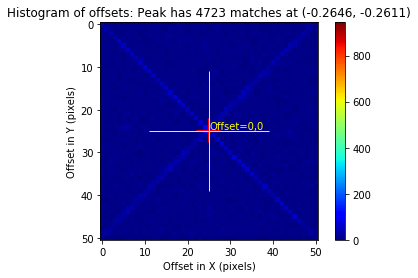

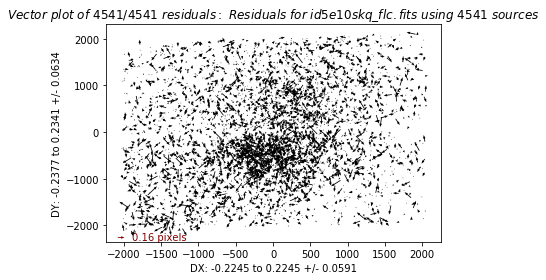

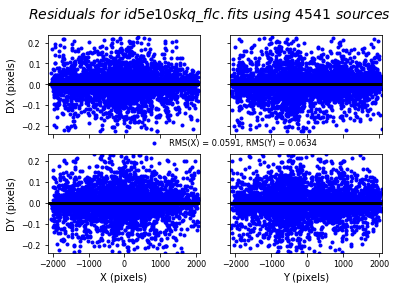

In [16]:
align_images(input_images, searchrad=1.0)

### See options for final collation of the table

In [12]:
make_final_table?

In [17]:
tbl = make_final_table(input_images, min_detections=3)

The output WCS is the following: 
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 156.0075414037232  -57.753665648018654  
CRPIX : 2068.5  2228.0  
CD1_1 CD1_2  : -1.0166677422129609e-05  4.214371042134262e-06  
CD2_1 CD2_2  : 4.214371042134262e-06  1.0166677422129609e-05  
NAXIS : 4137  4456

Matching stars from input images with peaks in peakmap
N matched: 2766
N matched: 2199
N matched: 2720
N matched: 2162
N matched: 2725
N matched: 2114
N matched: 2724
N matched: 2119
N matched: 2810
N matched: 2145
N matched: 2796
N matched: 2052

Final step: collating properties of matched stars
Clipping the fit quality
Rejected 274 measurements


/Users/vbajaj/anaconda2/envs/astroconda/lib/python2.7/site-packages/astropy/stats/sigma_clipping.py:158: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/Users/vbajaj/anaconda2/envs/astroconda/lib/python2.7/site-packages/astropy/stats/sigma_clipping.py:159: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


### See the results!
The columns are mbar, rbar, dbar, qbar, xbar, and ybar which are mean magnitude (instrumental), RA, Dec, Q (fit quality), X position in the output frame, and Y position in the output frame.  The columns ending in 'std' are the standard deviations of the values.  The last column 'n' is the number of times that source was detected (and not clipped out from the averaging).

In [18]:
tbl

mbar,rbar,dbar,qbar,xbar,ybar,mstd,rstd,dstd,qstd,xstd,ystd,n
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
-7.22066666667,156.029315169,-57.7846154349,0.732,17.2401550384,33.8824047049,0.152644103136,1.47809242097e-06,1.43269685928e-06,0.317254892266,0.106718080382,0.103364530568,9
-7.00833333333,156.031253858,-57.7820442725,0.914666666667,19.8634367458,285.66184844,0.183128977014,2.62721133702e-06,1.42499232891e-06,0.391222301114,0.166743425931,0.0718273201029,9
-8.6278,156.0390209,-57.7716830498,0.1626,32.3339735483,1299.46218336,0.0447276201021,7.4783370112e-07,1.99610252474e-07,0.027273430294,0.0391325909663,0.0105246180755,7
-8.59725,156.043203584,-57.7663151383,0.18775,31.6005781058,1827.64818134,0.0727474226348,5.82693856381e-07,5.54735423081e-07,0.0109857862714,0.00729613460429,0.0573141791063,8
-13.5703333333,156.028853464,-57.7846536413,0.157,36.5745711437,22.1174493404,0.0104986771653,2.20642114449e-07,8.04073963767e-08,0.048048586521,0.0124798961309,0.00344378051644,9
-7.5362,156.029272452,-57.784104077,0.3346,36.9304941295,76.0183870629,0.166841721401,1.11686692578e-06,1.23891518704e-06,0.0723867391171,0.0700270001001,0.103419441766,7
-6.91233333333,156.047815875,-57.7601797381,0.802333333333,38.2316410371,2428.24507902,0.0124721912892,5.53254628393e-07,1.34036293236e-06,0.383406080054,0.0662683980142,0.105642811567,9
-13.5965,156.043390469,-57.765793535,0.383666666667,41.3576056844,1874.90362974,0.0282769045925,1.54643600626e-07,9.64721635454e-08,0.0666949939817,0.00854211226997,0.00774871023822,6
-11.863,156.046432356,-57.7616803356,0.0336666666667,48.0572558723,2276.61492002,0.00469041575982,1.34162983134e-07,3.76104292948e-08,0.00445969605342,0.00619527297457,0.00394780312183,6


### To access a column from the table, the syntax is `tbl[<colname>]` as seen below

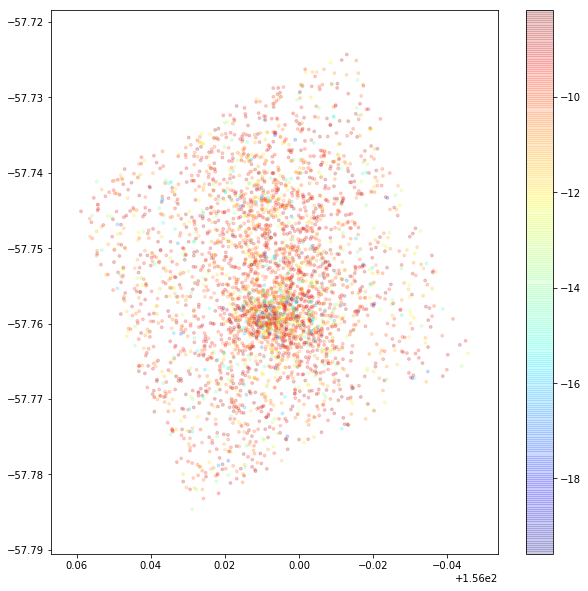

In [30]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['rbar'], tbl['dbar'], c=tbl['mbar'], s = 8, alpha=.2)
plt.xlim(plt.xlim()[::-1])
plt.colorbar()

(0, 0.1)

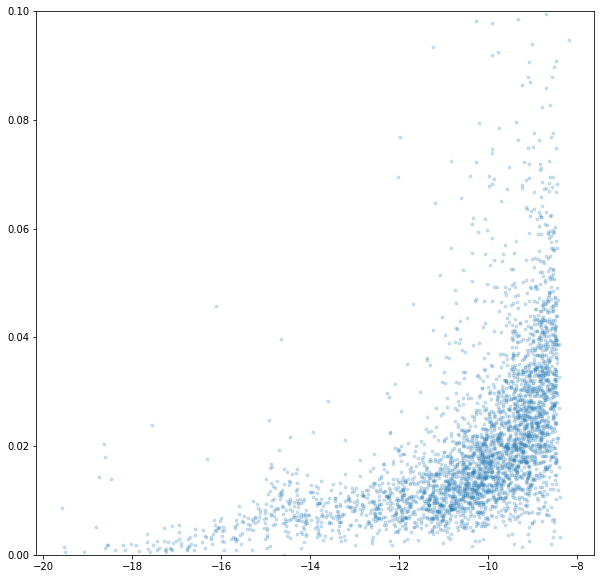

In [6]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['mbar'], tbl['mstd'], c=tbl['qbar'], s = 8, alpha=.2)
plt.ylim(0,.1)

(0, 0.1)

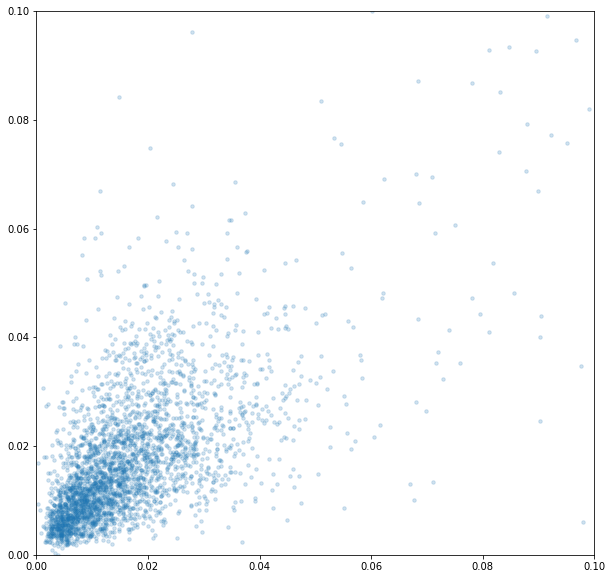

In [7]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['xstd'], tbl['ystd'], s = 12, alpha=.2)
plt.xlim(0,.1)
plt.ylim(0,.1)

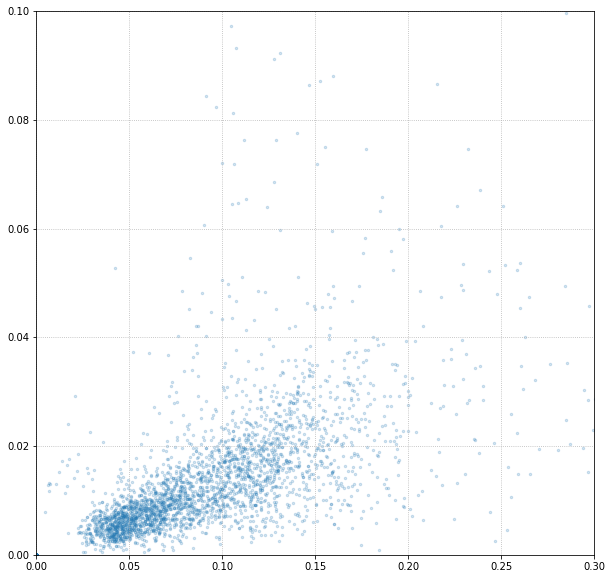

In [8]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['qbar'], tbl['qstd'], s = 6, alpha=.2)
plt.ylim(0,.1)
plt.xlim(0,.3)
plt.grid(ls=':')

(0, 0.1)

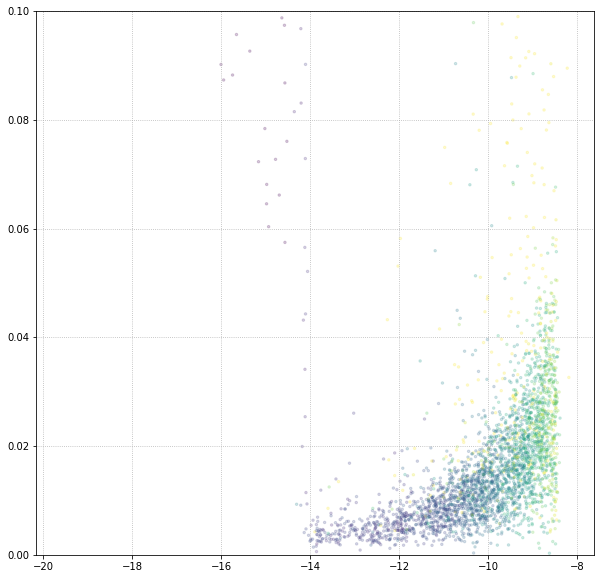

In [9]:
# stat, bedges, bn = binned_statistic(tbl['mbar'], tbl['xstd'],statistic=np.nanmedian, bins=20)
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['mbar'], tbl['xstd'], s = 6, alpha=.2, c=tbl['qbar'], vmin=0, vmax=.2)
# plt.scatter(bedges[1:], stat)
plt.grid(ls=':')
plt.ylim(0,.1)

(array([ 446.,  772.,  660.,  454.,  349.,  221.,  144.,  104.,   67.,
          40.,   23.,   20.,   20.,   11.,    9.,    6.,   12.,    6.,
           4.,    4.,    3.,    4.,    2.,    3.,    3.]),
 array([ 0.   ,  0.004,  0.008,  0.012,  0.016,  0.02 ,  0.024,  0.028,
         0.032,  0.036,  0.04 ,  0.044,  0.048,  0.052,  0.056,  0.06 ,
         0.064,  0.068,  0.072,  0.076,  0.08 ,  0.084,  0.088,  0.092,
         0.096,  0.1  ]),
 <a list of 25 Patch objects>)

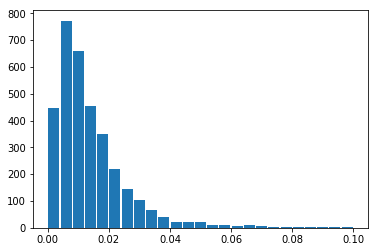

In [10]:
plt.hist(tbl['qstd'],rwidth=.9, bins=25, range=(0,.1))

In [14]:
from astropy.stats import sigma_clip

In [15]:
sigma_clip(np.array(tbl['qbar']), copy=True).mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [16]:
qb = tbl['qbar']

In [17]:
np.array(qb).shape

(3458,)

In [18]:
from psf_tools.CatalogUtils import read_one_pass_tbl

In [19]:
read_one_pass_tbl('id5e10s9q_flc.xympqk')

x,y,m,p,q,k
float64,float64,float64,float64,float64,float64
706.45,9.766,-8.529,586.7,0.494,1.0
2469.512,52.411,-13.102,22453.74,0.043,1.0
2895.42,72.647,-9.176,806.01,0.549,1.0
910.744,92.809,-8.698,432.52,0.084,1.0
3015.644,93.993,-10.653,2912.4,0.037,1.0
3706.624,127.997,-8.874,775.71,0.807,1.0
3887.186,143.004,-10.781,2915.62,0.143,1.0
1196.823,146.962,-8.634,459.09,0.075,1.0
3486.253,159.573,-9.793,1560.46,1.028,1.0


(0, 0.3)

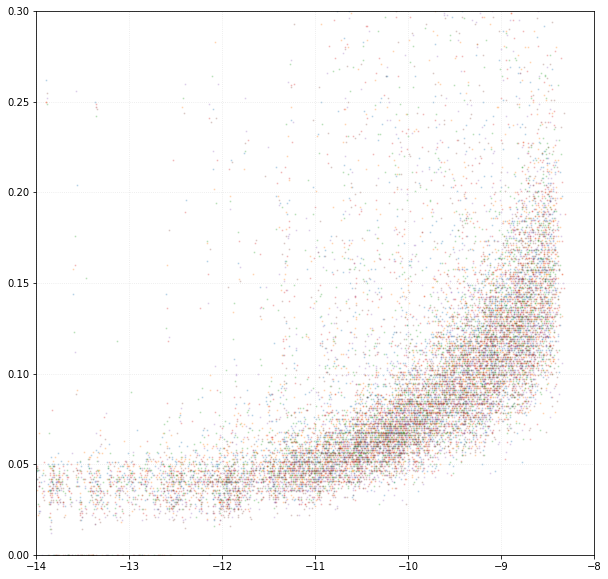

In [20]:
fig = plt.figure(figsize=(10,10))
for im in input_images:
    derp = read_one_pass_tbl(im.replace('fits', 'xympqk'))
    plt.scatter(derp['m'], derp['q'], s=1, alpha=.2)
plt.grid(ls=':', alpha=.3)
plt.xlim(-14,-8)
plt.ylim(0,.3)

(0, 0.1)

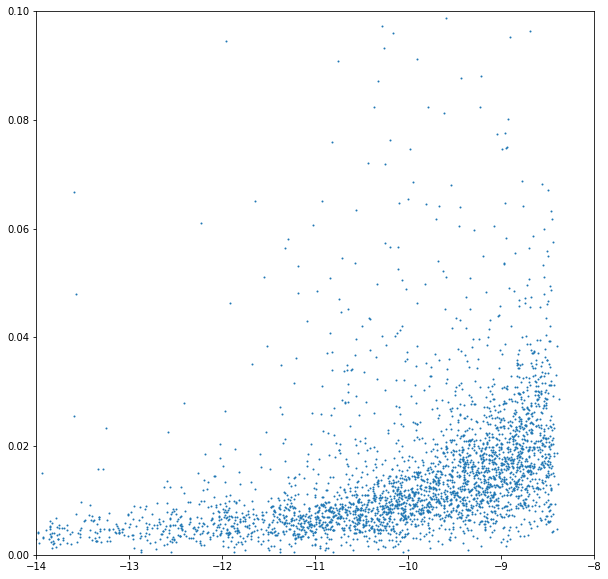

In [21]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['mbar'], tbl['qstd'], s=1)
plt.xlim(-14,-8)
plt.ylim(0,.1)

In [7]:
from psf_tools.CatalogUtils import make_chip_catalogs

In [8]:
make_chip_catalogs(onepasstbls)

id5e10saq_flc.xympqk
id5e10scq_flc.xympqk
id5e10seq_flc.xympqk
id5e10sgq_flc.xympqk
id5e10siq_flc.xympqk
id5e10skq_flc.xympqk
